Download packages

In [2]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
import sklearn
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
import os
import pandas as pd
import random
import matplotlib.pyplot as plt

C:\Users\CHVI0030\AppData\Local\Temp\ipykernel_13600\1962829646.py:11: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
import mne
import numpy as np

In [4]:
import neurokit2 as nk

In [82]:
%matplotlib widget

In [5]:
random.seed(8)

Create new feature names to take the mean and std across epochs pr person

In [53]:
m_list = ['Delta', 'Delta_N', 'Theta', 'Theta_N', 'Alpha', 'Alpha_N', 'Beta', 'Beta_N', 'Gamma', 'Gamma_N', 'SE', 'MSF', 'Sef90', 'Sef95', 'PE', 'wSMI', 'Kolmogorov', 'MeanRR', 'StdRR', 'MeanHR', 'StdHR', 'MinHR', 'MaxHR'] 
mean_list = [i + '_mean' for i in m_list]
std_list = [i + '_std' for i in m_list]
print(mean_list)

['Delta_mean', 'Delta_N_mean', 'Theta_mean', 'Theta_N_mean', 'Alpha_mean', 'Alpha_N_mean', 'Beta_mean', 'Beta_N_mean', 'Gamma_mean', 'Gamma_N_mean', 'SE_mean', 'MSF_mean', 'Sef90_mean', 'Sef95_mean', 'PE_mean', 'wSMI_mean', 'Kolmogorov_mean', 'MeanRR_mean', 'StdRR_mean', 'MeanHR_mean', 'StdHR_mean', 'MinHR_mean', 'MaxHR_mean']


Take the mean and std across features and create dataframes

In [54]:
path ='CSV_individual_cross_val/'
folder = os.fsencode(path)
renamed_markers_list = ['No.', 'Event', 'Delta', 'Delta_N', 'Theta', 'Theta_N', 'Alpha', 'Alpha_N', 'Beta', 'Beta_N', 'Gamma', 'Gamma_N', 'SE', 'MSF', 'Sef90', 'Sef95', 'PE', 'wSMI', 'Kolmogorov', 'MeanRR', 'StdRR', 'MeanHR', 'StdHR', 'MinHR', 'MaxHR', 'freq_slope_mean','freq_slope_std'] 
m_list = ['Delta', 'Delta_N', 'Theta', 'Theta_N', 'Alpha', 'Alpha_N', 'Beta', 'Beta_N', 'Gamma', 'Gamma_N', 'SE', 'MSF', 'Sef90', 'Sef95', 'PE', 'wSMI', 'Kolmogorov', 'MeanRR', 'StdRR', 'MeanHR', 'StdHR', 'MinHR', 'MaxHR', 'freq_slope_mean','freq_slope_std'] 
mean_list = [i + '_mean' for i in m_list]
std_list = [i + '_std' for i in m_list]

r_data = []
m_data = []
f_data = []

patient_numbers = []


for file in os.listdir(folder):
    filename = os.fsdecode(file)
    patient_numbers.append(filename[0:3])

    fname = path + filename
    data = pd.read_csv(fname)
    data.columns = renamed_markers_list
    R_indicesToKeep = data['Event'] == 'R'
    df_r = data.loc[R_indicesToKeep]

    M_indicesToKeep = data['Event'] == 'M'
    df_m = data.loc[M_indicesToKeep]

    F_indicesToKeep = data['Event'] == 'F'
    df_f = data.loc[F_indicesToKeep]
   

    r_mean = pd.DataFrame(df_r[m_list].mean(axis=0)).transpose()
    m_mean = pd.DataFrame(df_m[m_list].mean(axis=0)).transpose()
    f_mean = pd.DataFrame(df_f[m_list].mean(axis=0)).transpose()

    r_mean.columns = mean_list
    m_mean.columns = mean_list
    f_mean.columns = mean_list

    r_std = pd.DataFrame(df_r[m_list].std(axis=0)).transpose()
    m_std = pd.DataFrame(df_m[m_list].std(axis=0)).transpose()
    f_std = pd.DataFrame(df_f[m_list].std(axis=0)).transpose()
        
    r_std.columns = std_list
    m_std.columns = std_list
    f_std.columns = std_list
    
    rest = pd.concat([r_mean,r_std],axis=1).to_numpy()
    med = pd.concat([m_mean,m_std],axis=1).to_numpy()
    fam = pd.concat([f_mean,f_std],axis=1).to_numpy()

    r_data.append(rest[0])
    m_data.append(med[0])
    f_data.append(fam[0])


In [46]:
len(r_data)+len(f_data)

148

Get random indexes to chose which files to take m-r, f-r or r-m, r-f NOT USED CURRENTLY

In [47]:
indexes = random.sample(range(0,len(r_data)),int(len(r_data)/2))
print(indexes)

[49, 48, 13, 7, 43, 30, 11, 63, 26, 18, 8, 34, 60, 2, 31, 44, 12, 9, 55, 37, 29, 46, 54, 28, 64, 35, 22, 27, 66, 10, 38, 6, 62, 20, 47, 59, 32]


Take the differences and concatenate data

In [55]:
X = [f_data[i] - r_data[i] for i in range(len(r_data))] + [m_data[i] - r_data[i] for i in range(len(r_data))]
X = sklearn.preprocessing.StandardScaler().fit(X).transform(X)
print(X.shape)
y = [i for i in range(0,len(r_data))] + [i for i in range(0,len(r_data))]
print(len(y))

(148, 50)
148


pca should not be used currently

In [89]:
"""n_components = 10
pca = sklearn.decomposition.PCA(n_components=n_components)
X = pca.fit_transform(X)
components = pca.components_"""

'n_components = 10\npca = sklearn.decomposition.PCA(n_components=n_components)\nX = pca.fit_transform(X)\ncomponents = pca.components_'

In [90]:
"""pca.explained_variance_ratio_"""

'pca.explained_variance_ratio_'

Take the chosen features to use for the clustering algorithm

In [56]:
#chosen_features_ind = ['Beta_mean', 'Beta_std', 'PE_mean', 'PE_std', 'Alpha_mean', 'Alpha_std','Delta_mean', 'Delta_std', 'Theta_mean', 'Theta_std']
chosen_features_ind = ['wSMI_mean', 'freq_slope_mean_mean']
b= mean_list+std_list
print(b)
ind = [True if b[i] in chosen_features_ind else False for i in range(len(b))]
#print(ind)
X = X[:,ind]

['Delta_mean', 'Delta_N_mean', 'Theta_mean', 'Theta_N_mean', 'Alpha_mean', 'Alpha_N_mean', 'Beta_mean', 'Beta_N_mean', 'Gamma_mean', 'Gamma_N_mean', 'SE_mean', 'MSF_mean', 'Sef90_mean', 'Sef95_mean', 'PE_mean', 'wSMI_mean', 'Kolmogorov_mean', 'MeanRR_mean', 'StdRR_mean', 'MeanHR_mean', 'StdHR_mean', 'MinHR_mean', 'MaxHR_mean', 'freq_slope_mean_mean', 'freq_slope_std_mean', 'Delta_std', 'Delta_N_std', 'Theta_std', 'Theta_N_std', 'Alpha_std', 'Alpha_N_std', 'Beta_std', 'Beta_N_std', 'Gamma_std', 'Gamma_N_std', 'SE_std', 'MSF_std', 'Sef90_std', 'Sef95_std', 'PE_std', 'wSMI_std', 'Kolmogorov_std', 'MeanRR_std', 'StdRR_std', 'MeanHR_std', 'StdHR_std', 'MinHR_std', 'MaxHR_std', 'freq_slope_mean_std', 'freq_slope_std_std']


In [57]:
print(X.shape)

(148, 2)


In [13]:
patient_numbers[10]

'p20'

In [80]:
148/2

74.0

In [58]:
import scipy.cluster.hierarchy as spc

df = pd.DataFrame(X.T)
corr = df.corr().values

pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 3, 'maxclust')

In [15]:
len(pdist)

10878

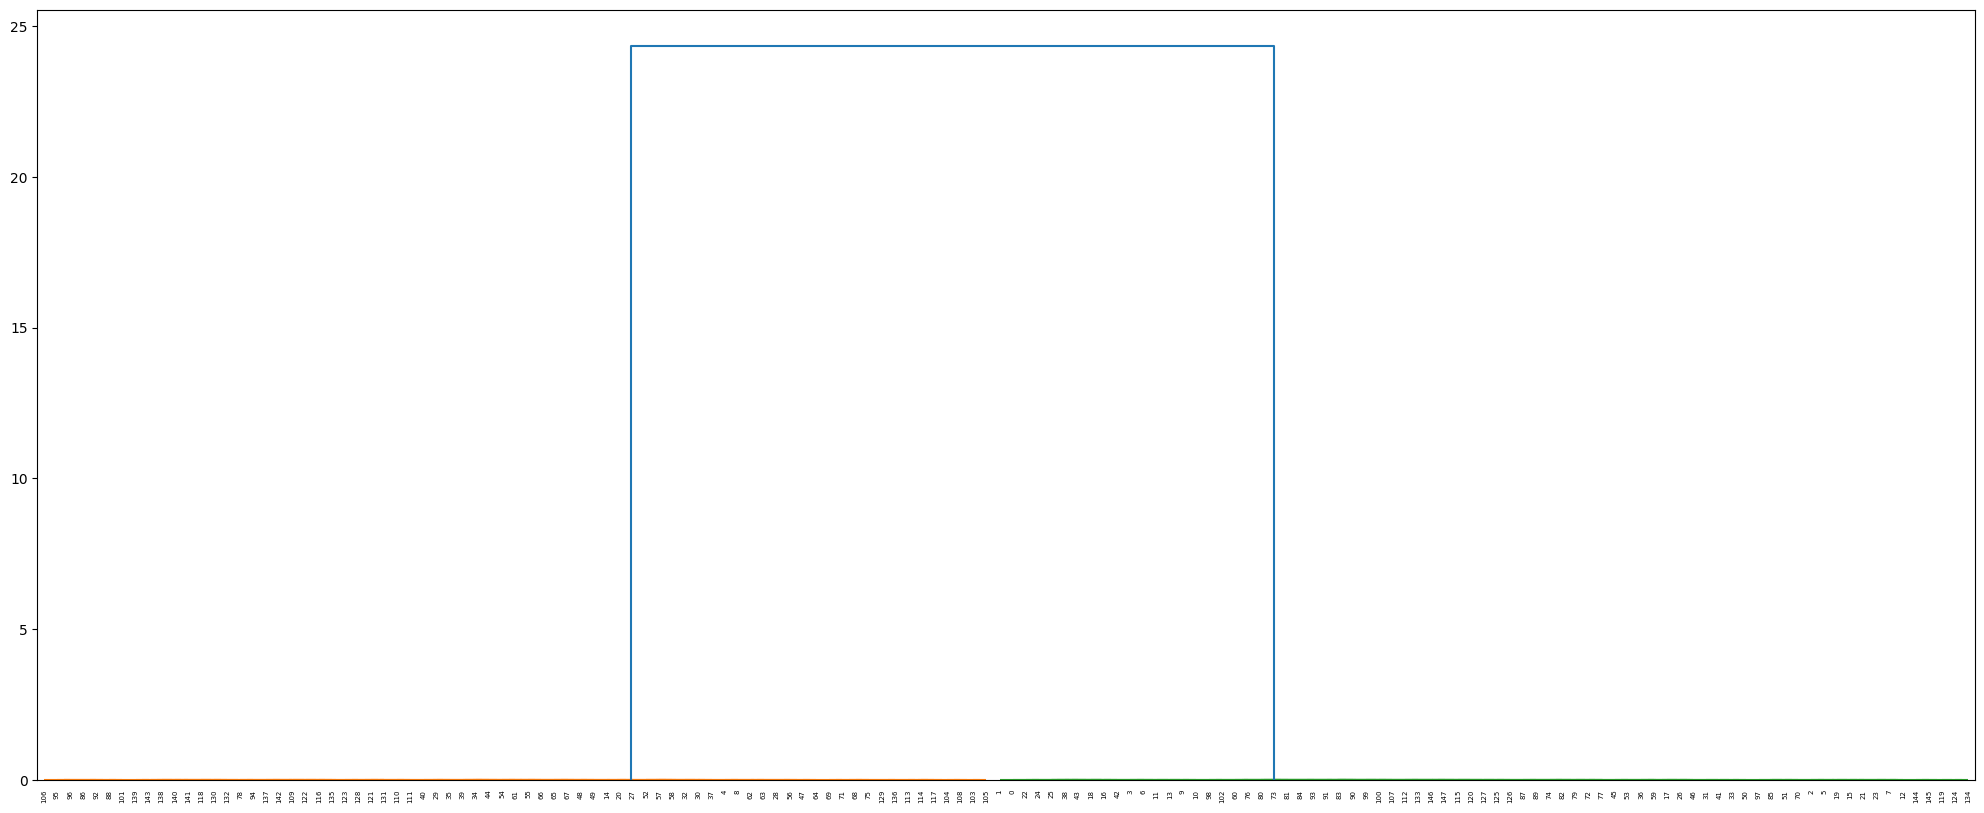

In [59]:
fig = plt.figure(figsize=(25, 10))
dn = spc.dendrogram(linkage)

In [60]:
print(idx)

[2 3 2 2 1 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 1 2 1 2 1 1 2
 1 2 1 1 2 2 2 1 2 2 1 1 1 2 2 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 1 2 2
 2 1 2 2 1 2 2 2 2 2 2 2 1 2 1 2 2 2 1 2 1 1 1 2 2 2 2 1 2 1 1 1 1 2 1 1 1
 1 2 1 1 2 1 1 1 2 2 1 1 1 2 2 2 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2]


In [61]:
clusters = np.unique(idx)

from collections import Counter
c = Counter(idx)

print(clusters)
print(len(clusters))
print(c.items())
print(c)

[1 2 3]
3
dict_items([(2, 74), (3, 1), (1, 73)])
Counter({2: 74, 1: 73, 3: 1})


In [31]:
23/74

0.3108108108108108

In [63]:
patient_n2 = patient_numbers + patient_numbers

responders = []
smallest = 3

for i in range(len(idx)):
    if idx[i] == smallest:
        patient = patient_n2[i]
        responders.append(patient)

print(responders)

['p11']


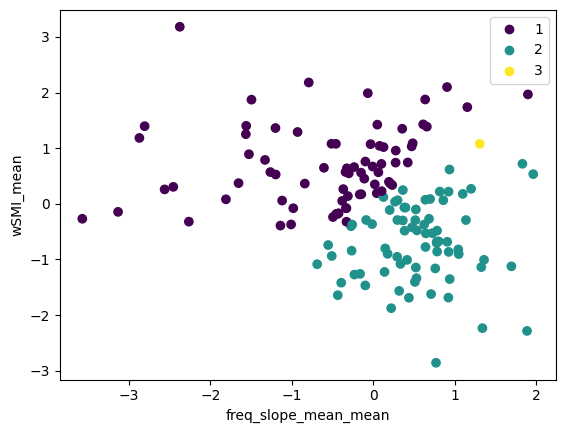

In [66]:
new_X = X[:,:2]

scatter = plt.scatter(new_X[:,1], new_X[:,0], c=idx)
plt.xlabel(chosen_features_ind[1])
plt.ylabel(chosen_features_ind[0])
plt.legend(
    scatter.legend_elements()[0],
    [1,2,3]
)
plt.show()

In [113]:
y_pred = KMeans(n_clusters=2, n_init=10).fit_predict(X)
print(y_pred)
print((y_pred == 0).sum())
print((y_pred == 1).sum())

[0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1
 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0
 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0
 1 0]
69
81


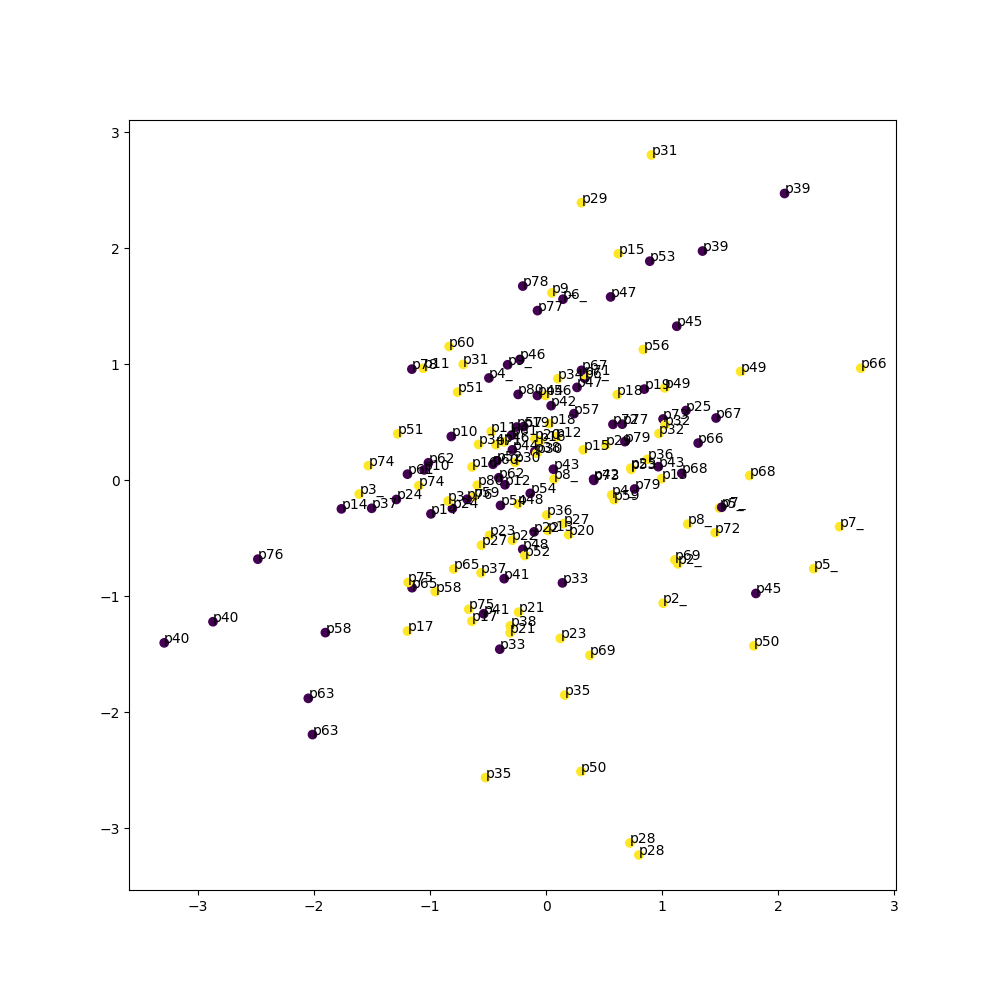

In [115]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X[:, 0], X[:, -2], c=y_pred)

for i, txt in enumerate(y):
    ax.annotate(patient_numbers[txt], (X[i, 0], X[i, -2]))  #0 and 2 to chose mean values of the two chosen values
ax.set_aspect('equal', adjustable=None, anchor=None, share=False)
#ax.set_xticks(np.arange(-6,25,2)) 
plt.show()

In [117]:
y_pred = GaussianMixture(n_components=2, n_init=10).fit_predict(X)

patient_numbers2 = patient_numbers+patient_numbers
h = y_pred == 1
n = y_pred == 0
print([b for a, b in zip(h, patient_numbers2) if a])
print([b for a, b in zip(n, patient_numbers2) if a])

print(y_pred)

print((y_pred == 0).sum())
print((y_pred == 1).sum())

['p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p27', 'p28', 'p29', 'p2_', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 'p36', 'p37', 'p38', 'p39', 'p3_', 'p40', 'p41', 'p42', 'p43', 'p44', 'p45', 'p46', 'p47', 'p48', 'p49', 'p4_', 'p50', 'p51', 'p52', 'p53', 'p54', 'p56', 'p57', 'p58', 'p59', 'p5_', 'p60', 'p61', 'p62', 'p63', 'p65', 'p66', 'p67', 'p68', 'p69', 'p6_', 'p71', 'p72', 'p73', 'p74', 'p75', 'p77', 'p78', 'p79', 'p7_', 'p80', 'p8_', 'p9_', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p27', 'p28', 'p29', 'p2_', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 'p36', 'p37', 'p38', 'p39', 'p3_', 'p40', 'p41', 'p42', 'p43', 'p44', 'p45', 'p46', 'p47', 'p48', 'p49', 'p4_', 'p50', 'p51', 'p52', 'p53', 'p54', 'p56', 'p57', 'p58', 'p59', 'p5_', 'p60', 'p61', 'p62', 'p63', 'p65', 'p66', 'p67', 'p68', 'p69', 'p6_', 'p71', 'p72', 'p73', 'p74', 'p75', 'p77', 'p78'

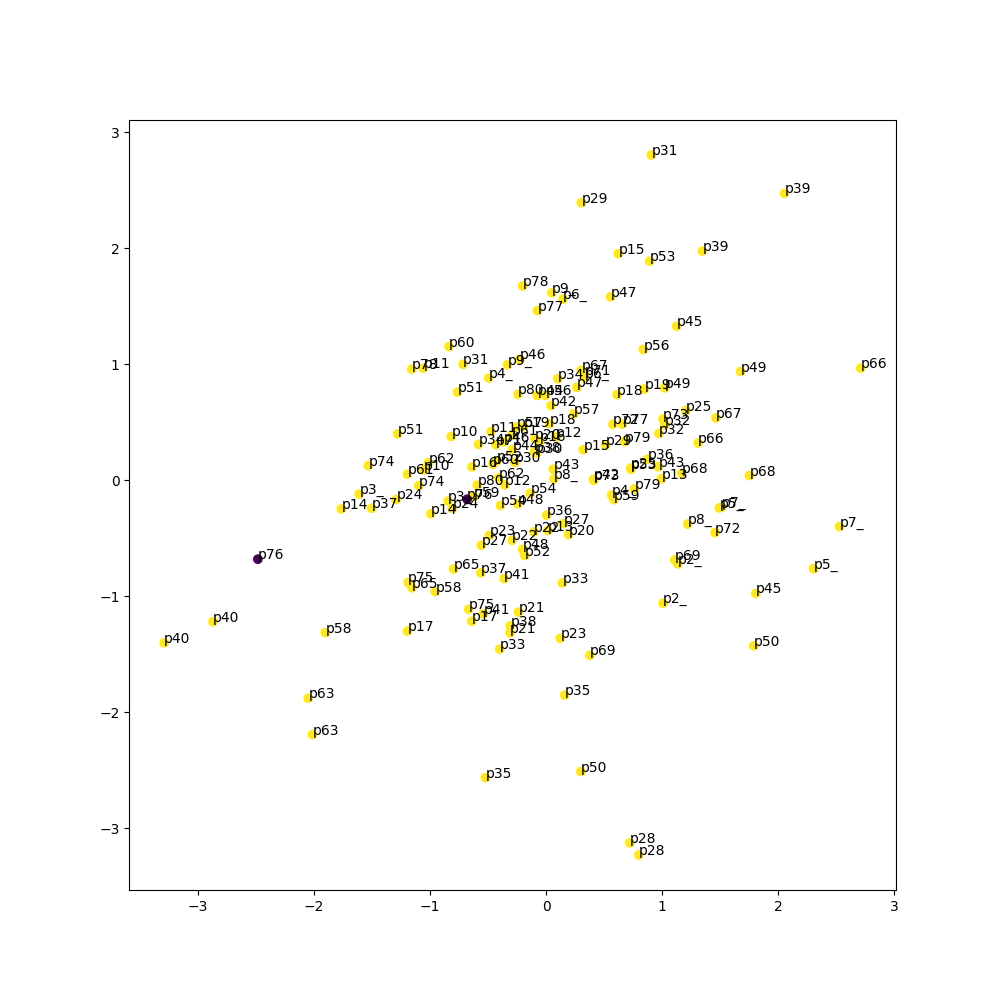

In [118]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X[:, 0], X[:, -2], c=y_pred)

for i, txt in enumerate(y):
    ax.annotate(patient_numbers[txt], (X[i, 0], X[i, -2]))
ax.set_aspect('equal', adjustable=None, anchor=None, share=False)
#ax.set_xticks(np.arange(-6,25,2)) 
plt.show()

In [125]:
clustering = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0).fit(X)
print(clustering)

SpectralClustering(assign_labels='discretize', n_clusters=2, random_state=0)


['p76', 'p76']
['p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p27', 'p28', 'p29', 'p2_', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 'p36', 'p37', 'p38', 'p39', 'p3_', 'p40', 'p41', 'p42', 'p43', 'p44', 'p45', 'p46', 'p47', 'p48', 'p49', 'p4_', 'p50', 'p51', 'p52', 'p53', 'p54', 'p56', 'p57', 'p58', 'p59', 'p5_', 'p60', 'p61', 'p62', 'p63', 'p65', 'p66', 'p67', 'p68', 'p69', 'p6_', 'p71', 'p72', 'p73', 'p74', 'p75', 'p77', 'p78', 'p79', 'p7_', 'p80', 'p8_', 'p9_', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p27', 'p28', 'p29', 'p2_', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 'p36', 'p37', 'p38', 'p39', 'p3_', 'p40', 'p41', 'p42', 'p43', 'p44', 'p45', 'p46', 'p47', 'p48', 'p49', 'p4_', 'p50', 'p51', 'p52', 'p53', 'p54', 'p56', 'p57', 'p58', 'p59', 'p5_', 'p60', 'p61', 'p62', 'p63', 'p65', 'p66', 'p67', 'p68', 'p69', 'p6_', 'p71', 'p72', 'p73', 'p74', 'p75

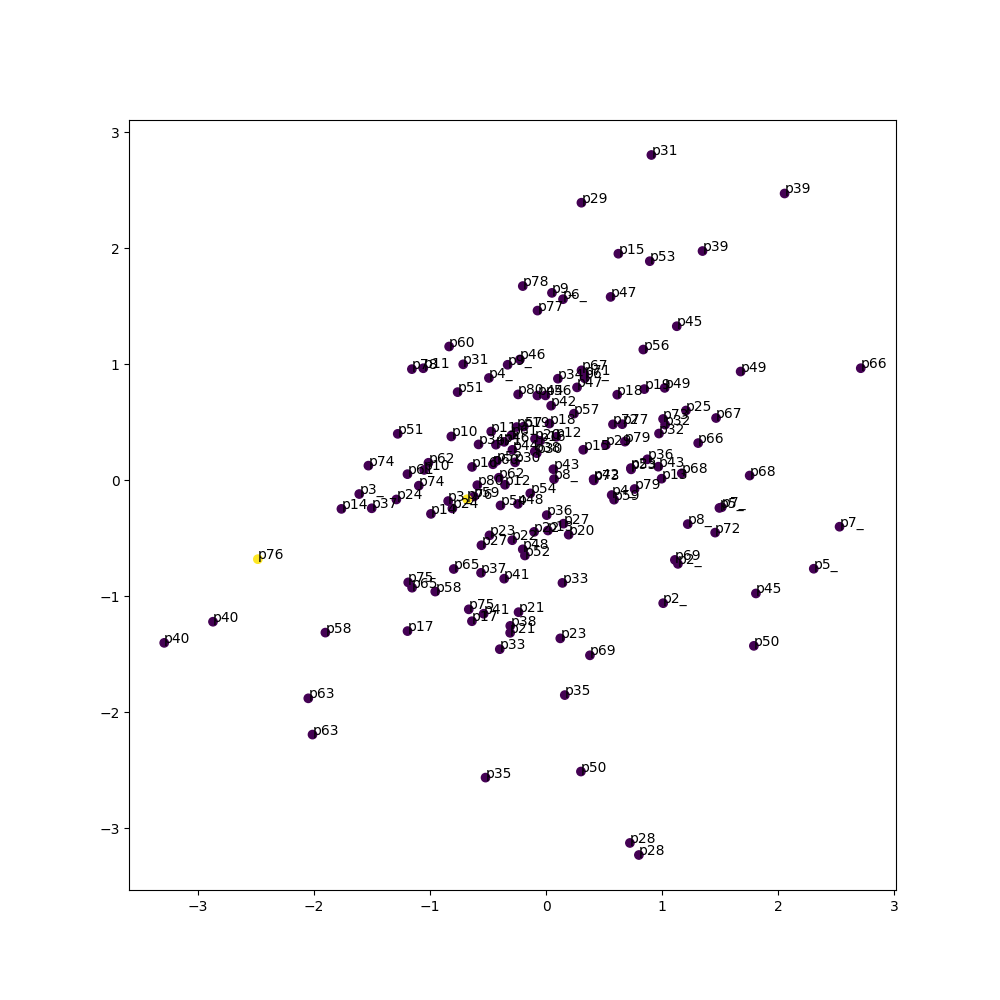

In [126]:
y_pred = clustering.labels_
patient_numbers2 = patient_numbers+patient_numbers
h = y_pred == 1
n = y_pred == 0
print([b for a, b in zip(h, patient_numbers2) if a])
print([b for a, b in zip(n, patient_numbers2) if a])

print((y_pred == 0).sum())
print((y_pred == 1).sum())
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X[:, 0], X[:, -2], c=y_pred)

for i, txt in enumerate(y):
    ax.annotate(patient_numbers[txt], (X[i, 0], X[i, -2]))
ax.set_aspect('equal', adjustable=None, anchor=None, share=False)
#ax.set_xticks(np.arange(-6,25,2)) 
plt.show()

[-1 -1  0  1 -1  1 -1  1  1  1  0  1  1  1  1  0 -1  1  1 -1 -1  1  1 -1
  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1  1 -1  0  1 -1
  1 -1 -1 -1  1  1  1 -1  1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1
  1  0 -1  1  0  1 -1 -1  1  1 -1  1 -1  1  1  1  1 -1  0  1  1  1 -1  1
 -1 -1 -1  1  1 -1  1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1
  1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1
  1 -1 -1 -1]
[(-1, 72), (0, 7), (1, 69)]


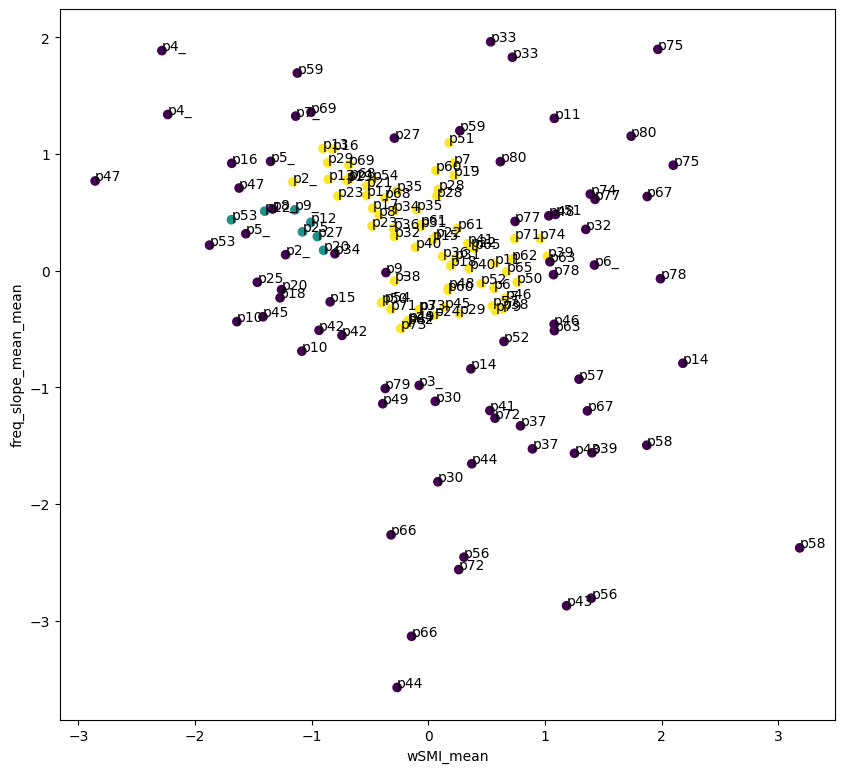

In [77]:
from sklearn.cluster import HDBSCAN
hdb = HDBSCAN(min_cluster_size=5).fit(X)
y_pred = hdb.labels_
print(y_pred)
patient_numbers2 = patient_numbers+patient_numbers
h = y_pred == 1
n = y_pred == 0
#print([b for a, b in zip(h, patient_numbers2) if a])
#print([b for a, b in zip(n, patient_numbers2) if a])

c1 = list(zip(*np.unique(y_pred, return_counts=True)))
print(c1)
#print((y_pred == 0).sum())
#print((y_pred == 1).sum())
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X[:, 0], X[:, 1], c=y_pred)

for i, txt in enumerate(y):
    ax.annotate(patient_numbers[txt], (X[i, 0], X[i, 1]))
ax.set_aspect('equal', adjustable=None, anchor=None, share=False)
ax.set_ylabel(chosen_features_ind[1])
ax.set_xlabel(chosen_features_ind[0])
#ax.set_xticks(np.arange(-6,25,2)) 
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[]
['p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p27', 'p28', 'p29', 'p2_', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 'p36', 'p37', 'p38', 'p39', 'p3_', 'p40', 'p41', 'p42', 'p43', 'p44', 'p45', 'p46', 'p47', 'p48', 'p49', 'p4_', 'p50', 'p51', 'p52', 'p53', 'p54', 'p56', 'p57', 'p58', 'p59', 'p5_', 'p60', 'p61', 'p62', 'p63', 'p65', 'p66', 'p67', 'p68', 'p69', 'p6_', 'p71', 'p72', 'p73', 'p74', 'p75', 'p76', 'p77', 'p78', 'p79', 'p7_', 'p80', 'p8_', 'p9_', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p27', 'p28', 'p29', 'p2_', 'p30', 'p31', 'p32', 'p33

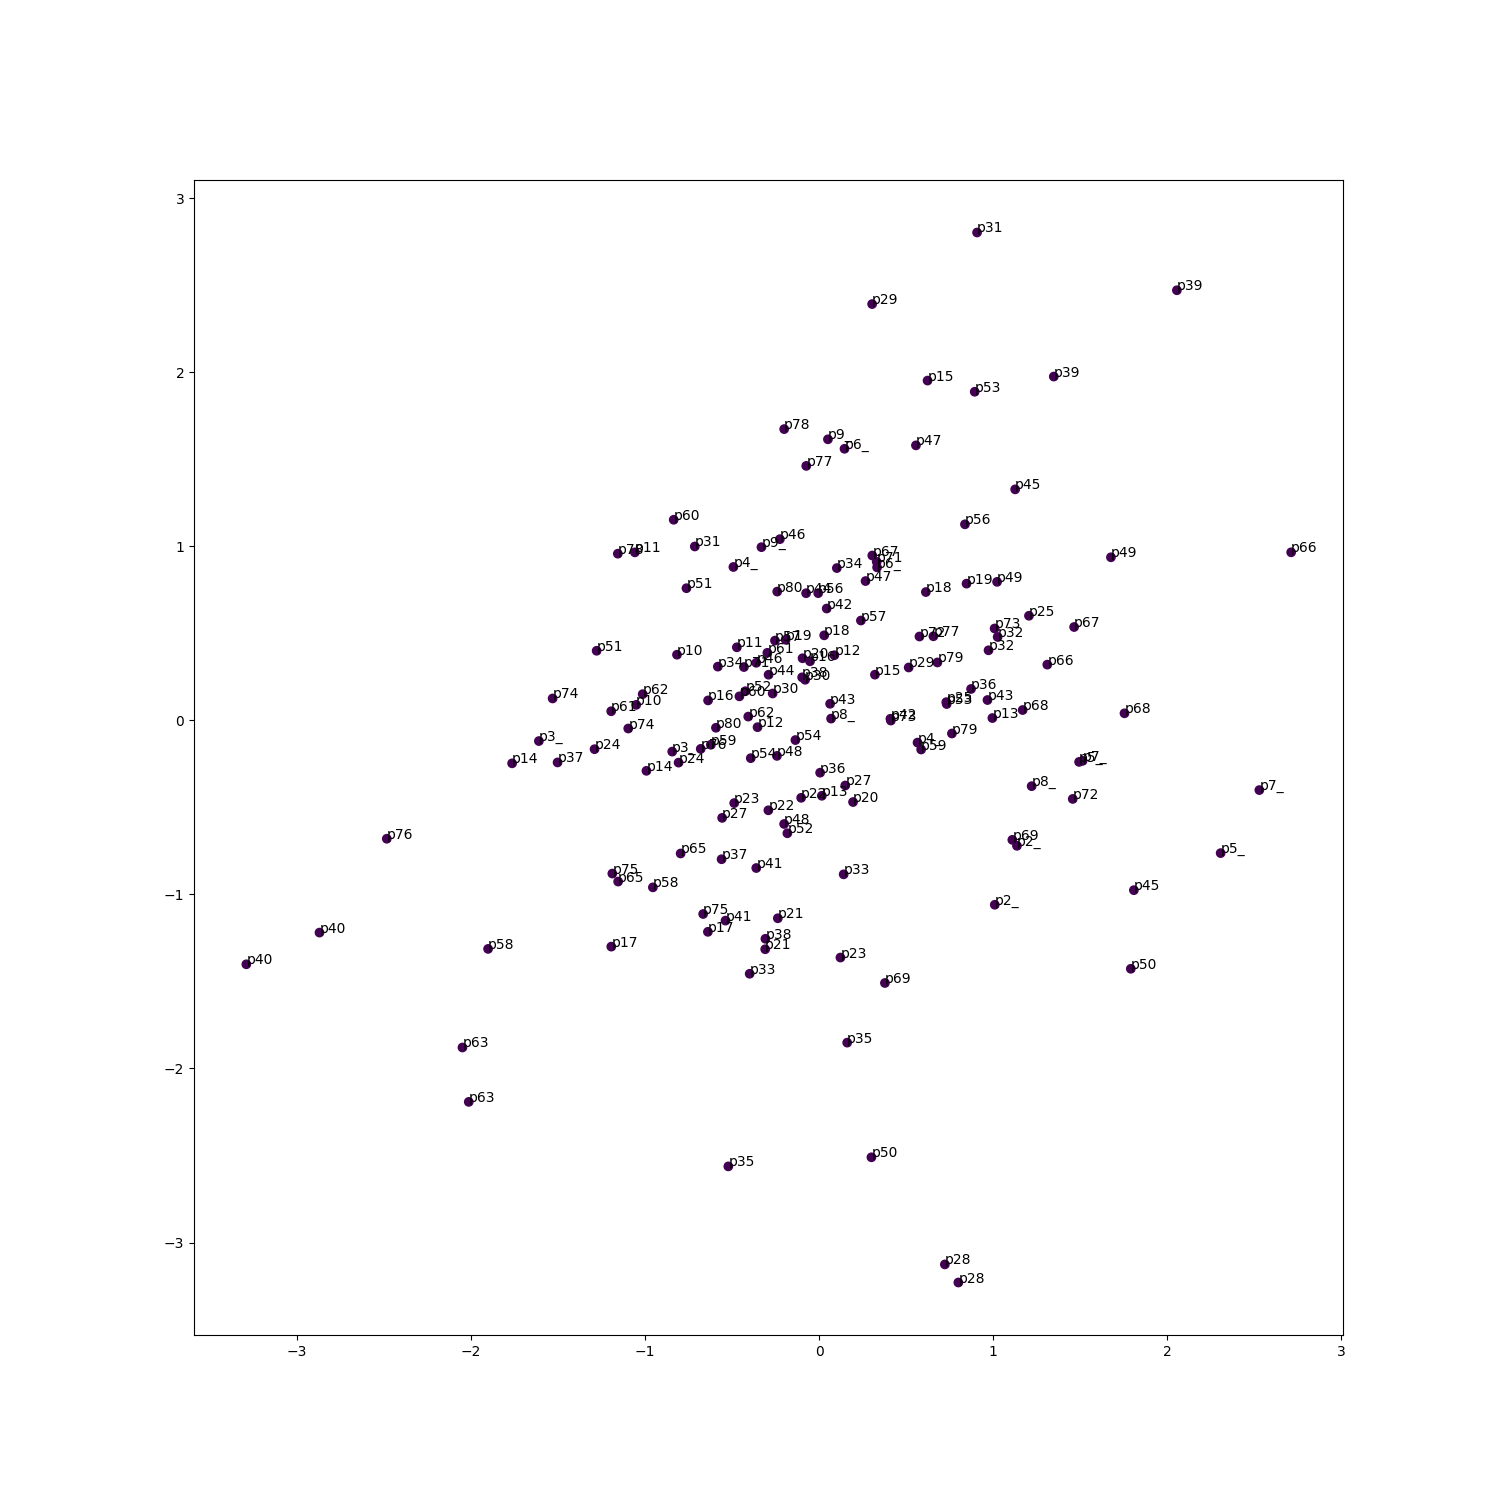

In [131]:
from sklearn.cluster import OPTICS
clustering = OPTICS(min_samples=5).fit(X)
y_pred = clustering.labels_
print(y_pred)
patient_numbers2 = patient_numbers+patient_numbers
h = y_pred == 1
n = y_pred == 0
print([b for a, b in zip(h, patient_numbers2) if a])
print([b for a, b in zip(n, patient_numbers2) if a])

print((y_pred == 0).sum())
print((y_pred == 1).sum())
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(X[:, 0], X[:, -2], c=y_pred)

for i, txt in enumerate(y):
    ax.annotate(patient_numbers[txt], (X[i, 0], X[i, -2]))
ax.set_aspect('equal', adjustable=None, anchor=None, share=False)
#ax.set_xticks(np.arange(-6,25,2)) 
plt.show()